# In Drive Coupon Recommendation
---

## Problem Statement
---

This data was collected via a survey on the Ecom website Mechanical Turk. The survey describes different driving scenarios including the user’s destination, current time, weather, passenger, coupon attributes, user attributes, and contextual attributes, and then asks the user whether he/she will accept the coupon or not. In this project we have to predict if the user will accept the coupon.


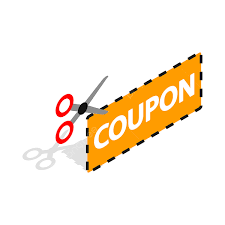

## Data Dictionary

1. Gender: Female, Male
2. Age: 21, 46, 26, 31, 41, 50plus, 36, below21
3. Marital Status: Unmarried partner, Single, Married partner, Divorced, Widowed
4. has_Children: 1: has children, 0: No children
5. Education: Some colleges — no degree, bachelor’s degree, Associates degree, High School Graduate, Graduate degree (Master or Doctorate), Some High School
6. Occupation: Traveller’s occupation 
7. Income: income of the traveler
8. Car: Description of vehicle driven by the traveller
9. Bar: how many times does the traveler go to a bar every month? 
10. Coffee House: how many times does the user go to a coffeehouse every month?
11. Carry Away: how many times does the user get takeaway food every month?
12. RestaurantLessThan20: how many times does the user go to a restaurant with an average expense per person of less than \$20 every month?
13. Restaurant20To50: how many times does the user go to a restaurant with an average expense per person of \$20 — \$50 every month
14. Destination: destination of traveler
15. Passenger: who are the passengers in the car 
16. Weather: weather when the user is driving (Sunny, Rainy, Snowy)
17. Temperature: temperature in Fahrenheit when the user is driving 
18. Coupon: Type of Cupon
19. Expiration: Validity of Cupon
20. toCoupon_GEQ5min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)
21. toCoupon_GEQ15min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)
22. toCoupon_GEQ25min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)
23. direction_same: whether the restaurant/cafe/bar is in the same direction as the traveler’s current destination (0,1)
24. direction_opp: whether the restaurant/cafe/bar is in the opposite direction as the user’s current destination (0,1)
25. Accept(Y/N?)- Target column( whether user will accept the coupon or not?)

## Importing Libraries

In [1]:
import os
cwd = os.getcwd()
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)


from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

## Load the Data Set

In [2]:
data = pd.read_csv(cwd + "\\Data.csv")

In [3]:
# Creating copy of data set to avoid reloading of data
df = data.copy()

In [4]:
# Displaying first 5 rows
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


## Renaming the columns for better readability

In [5]:
def rename_column(old_name, new_name, data):
    """
    Renames column in dataset.

    Args:
      old_name (str): current name of column.
      new_name (str): new name of column.
      data (pandas.DataFrame): dataset in which renaming is to be performed.

    Returns:
      pandas.DataFrame: data after renaming the column.
      
    """
    data[new_name] = data[old_name]
    data.drop(old_name, inplace=True, axis=1)
    return data

In [6]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [7]:
rename_column("passanger", "passenger", df)
rename_column("maritalStatus", "marital_status", df)
rename_column("Bar", "bar", df)
rename_column("CoffeeHouse", "coffee_house", df)
rename_column("CarryAway", "carry_away", df)
rename_column("RestaurantLessThan20", "restaurant_less_than_20", df)
rename_column("Restaurant20To50", "restaurant_20_to_50", df)
rename_column("toCoupon_GEQ5min", "to_coupon_GEQ_5min", df)
rename_column("toCoupon_GEQ15min", "to_coupon_GEQ_15min", df)
rename_column("toCoupon_GEQ25min", "to_coupon_GEQ_25min", df)
rename_column("Accept(Y/N?)", "accepted", df)

,destination,weather,temperature,coupon,expiration,gender,age,has_children,education,occupation,income,car,direction_same,direction_opp,passenger,marital_status,bar,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,to_coupon_GEQ_5min,to_coupon_GEQ_15min,to_coupon_GEQ_25min,accepted
0,No Urgent Place,Sunny,55,Restaurant(<20),1d,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Alone,Unmarried partner,never,never,NaN,4~8,1~3,1,0,0,1
1,No Urgent Place,Sunny,80,Coffee House,2h,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Friend(s),Unmarried partner,never,never,NaN,4~8,1~3,1,0,0,0
2,No Urgent Place,Sunny,80,Carry out & Take away,2h,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Friend(s),Unmarried partner,never,never,NaN,4~8,1~3,1,1,0,1
3,No Urgent Place,Sunny,80,Coffee House,2h,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Friend(s),Unmarried partner,never,never,NaN,4~8,1~3,1,1,0,0
4,No Urgent Place,Sunny,80,Coffee House,1d,Female,21,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,0,1,Friend(s),Unmarried partner,never,never,NaN,4~8,1~3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Rainy,55,Carry out & Take away,1d,Male,26,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,1,0,Partner,Single,never,never,1~3,4~8,1~3,1,0,0,1
12680,Work,Rainy,55,Carry out & Take away,1d,Male,26,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,0,1,Alone,Single,never,never,1~3,4~8,1~3,1,0,0,1
12681,Work,Snowy,30,Coffee House,1d,Male,26,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,1,0,Alone,Single,never,never,1~3,4~8,1~3,1,0,0,0
12682,Work,Snowy,30,Bar,1d,Male,26,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,0,1,Alone,Single,never,never,1~3,4~8,1~3,1,1,1,0


In [8]:
# shape of dataset
df.shape

(12684, 25)

In [9]:
# dropping duplicate columns
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(12393, 25)

In [11]:
# checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   destination              12393 non-null  object
 1   weather                  12393 non-null  object
 2   temperature              12393 non-null  int64 
 3   coupon                   12393 non-null  object
 4   expiration               12393 non-null  object
 5   gender                   12393 non-null  object
 6   age                      12393 non-null  object
 7   has_children             12393 non-null  int64 
 8   education                12393 non-null  object
 9   occupation               12393 non-null  object
 10  income                   12393 non-null  object
 11  car                      106 non-null    object
 12  direction_same           12393 non-null  int64 
 13  direction_opp            12393 non-null  int64 
 14  passenger                12393 non-null  ob

#### We have missing values in car, bar, CoffeeHouse, CarryAway, RestaurantLessThan20 & Restaurant20To50. <br> We have to handle the missing values in these features
----

In [12]:
# Describing the data
df.describe()

,temperature,has_children,direction_same,direction_opp,to_coupon_GEQ_5min,to_coupon_GEQ_15min,to_coupon_GEQ_25min,accepted
count,12393.000000,12393.000000,12393.000000,12393.000000,12393.0,12393.000000,12393.000000,12393.000000
mean,63.252643,0.415557,0.213750,0.786250,1.0,0.563625,0.118051,0.565803
std,19.075396,0.492838,0.409969,0.409969,0.0,0.495955,0.322681,0.495671
min,30.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000
50%,80.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000
75%,80.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


### Target Variable
#### accepted is our target variable which contains 1 or 0 for Yes or No. Whether the user has accepted the coupon or not.

In [13]:
df['accepted'].value_counts()

accepted
1    7012
0    5381
Name: count, dtype: int64

#### We have 7210 "yes" and 5474 "no" so the data is fairly balanced. We can go for stratified sampling during training and testing. <br> And since the data is fairly balanced we can go for accuracy as our evaluation metric.
----

## Exploratory Data Analysing & Data Preprocessing

### car has more than 99% missing values. We should drop this column

In [14]:
df.drop('car', inplace=True, axis=1)

### Age can be converted to numeric column

In [15]:
df['age'].value_counts()

age
21         2598
26         2486
31         1984
50plus     1756
36         1293
41         1079
46          660
below21     537
Name: count, dtype: int64

In [16]:
df['age'] = np.where(df['age'] == '50plus', '51', df['age'])
df['age'] = np.where(df['age'] == 'below21', '20', df['age'])
df['age'] = df['age'].astype("int64")

### Frequency distribution of categorical variables

In [17]:
def countplot(df, feature):
    plt.figure(figsize=(6,5))
    sns.countplot(x=df[feature])
    plt.title("Frequency of values in " + feature)
    plt.xticks(rotation=60)
    plt.show()

In [18]:
categorical_features = ['destination', 'weather', 'coupon', 'expiration',
       'gender', 'has_children', 'education', 'occupation', 'income',
       'direction_same', 'direction_opp', 'passenger', 'marital_status',
       'bar', 'coffee_house', 'carry_away', 'restaurant_less_than_20',
       'restaurant_20_to_50', 'to_coupon_GEQ_5min', 'to_coupon_GEQ_15min',
       'to_coupon_GEQ_25min', 'accepted']

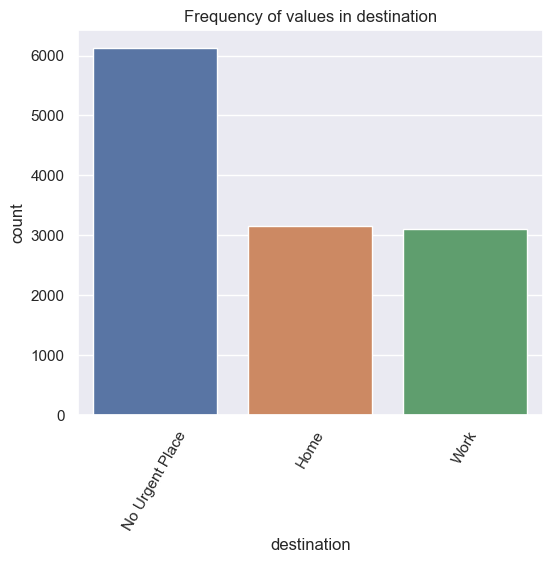

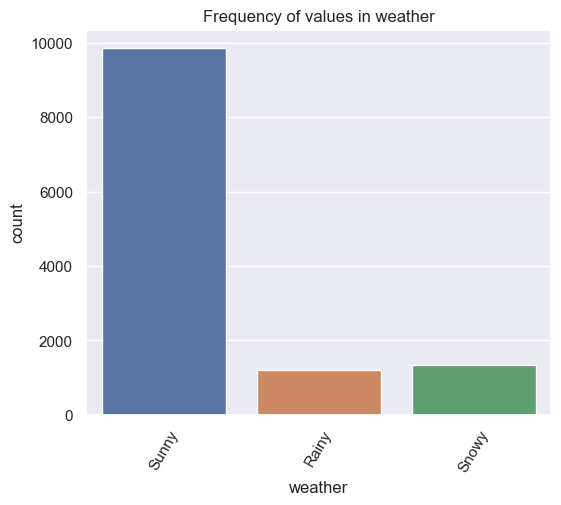

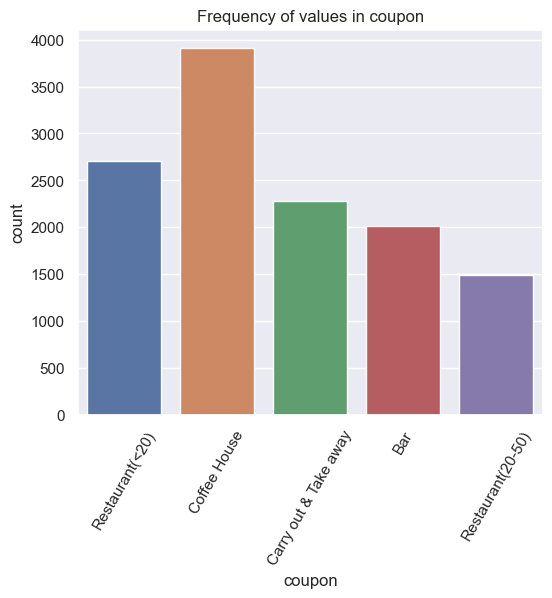

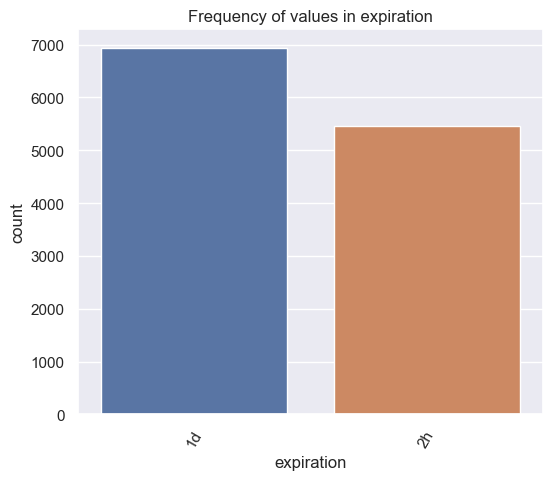

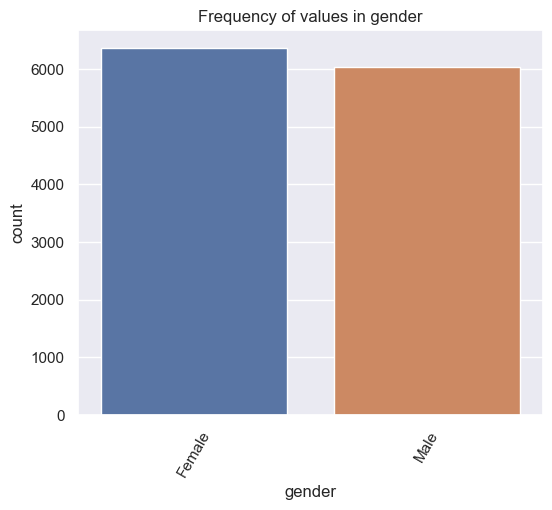

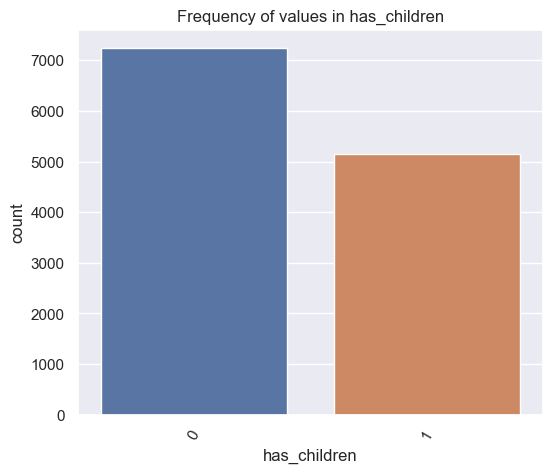

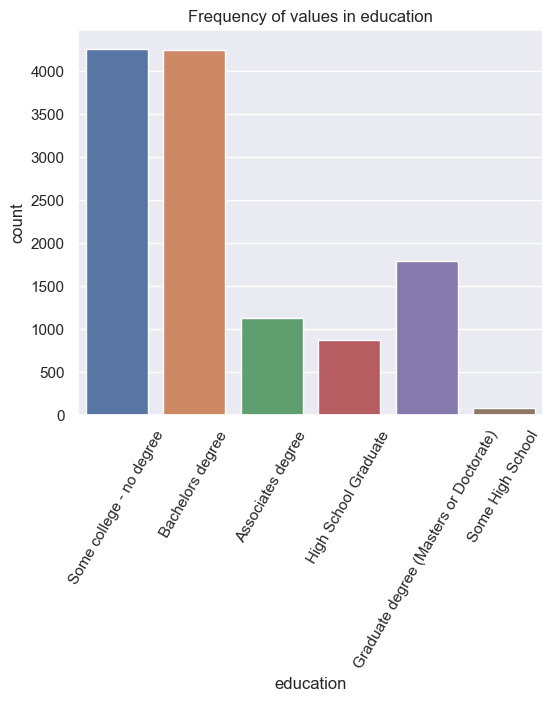

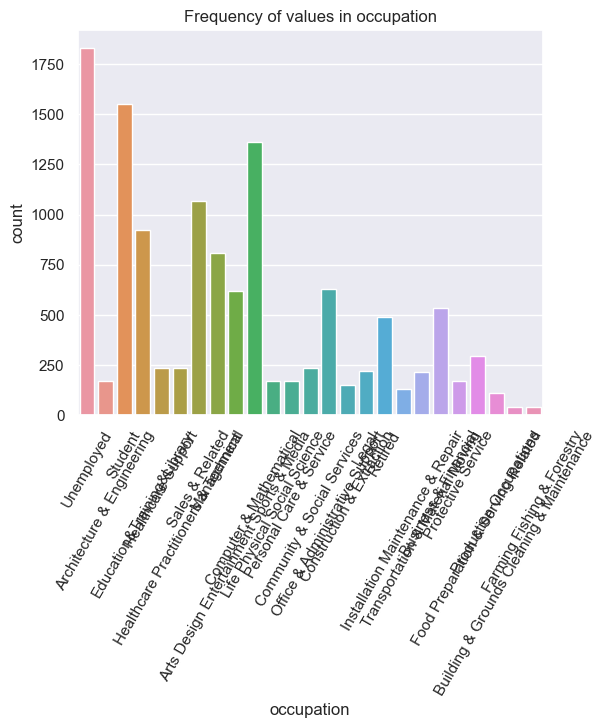

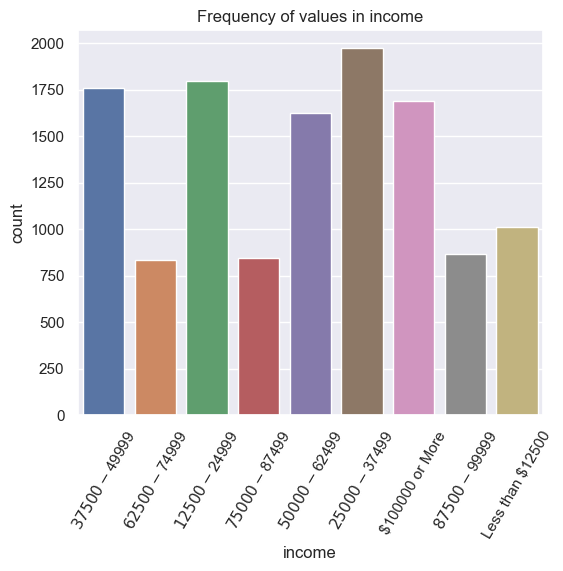

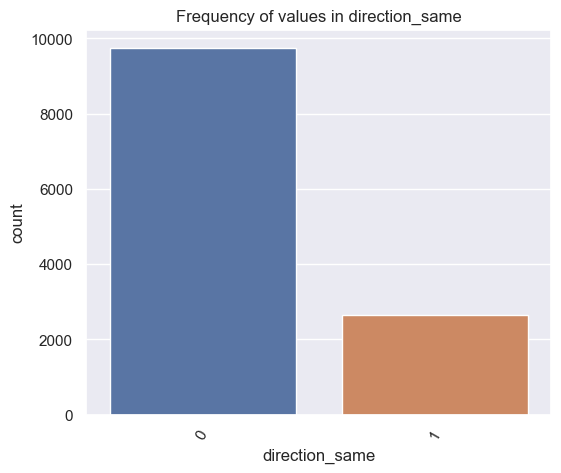

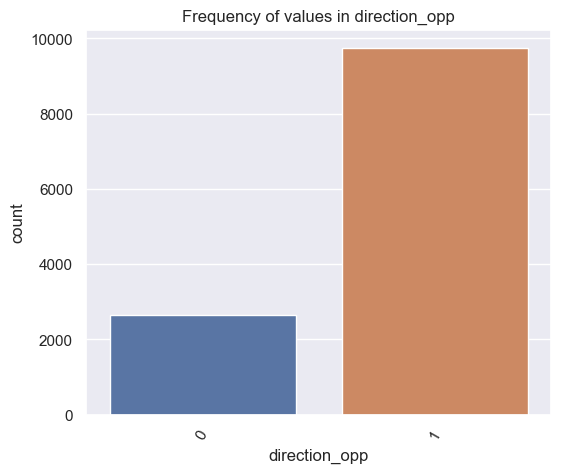

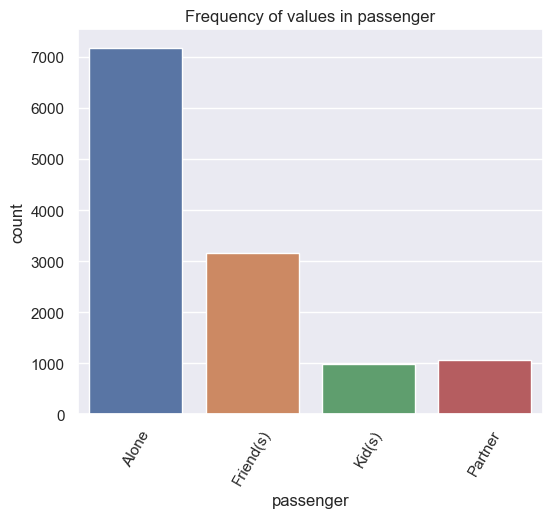

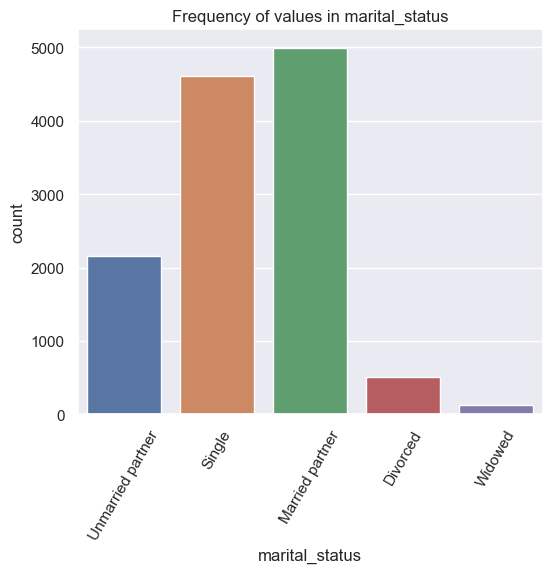

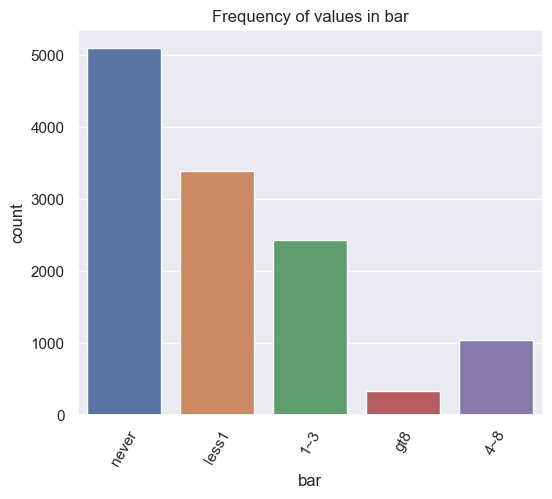

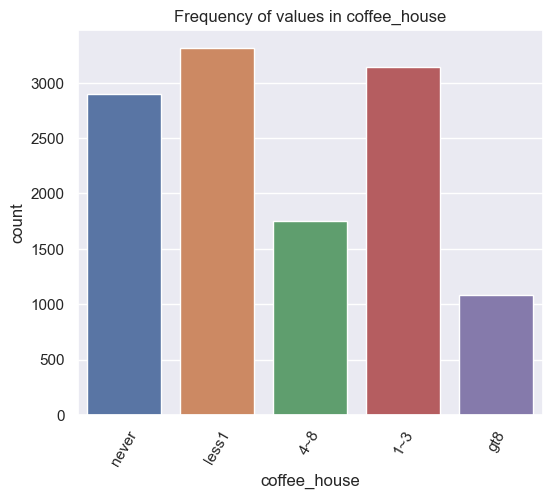

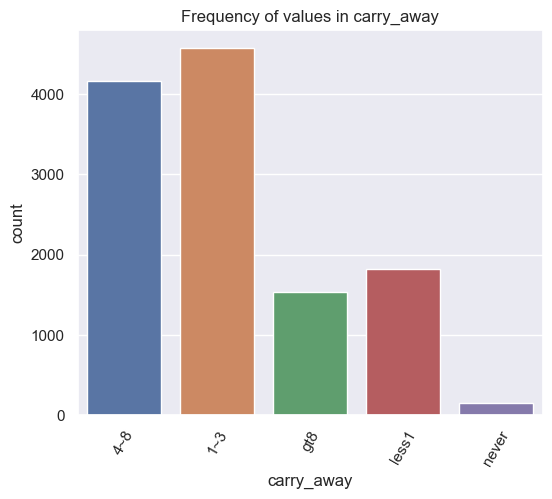

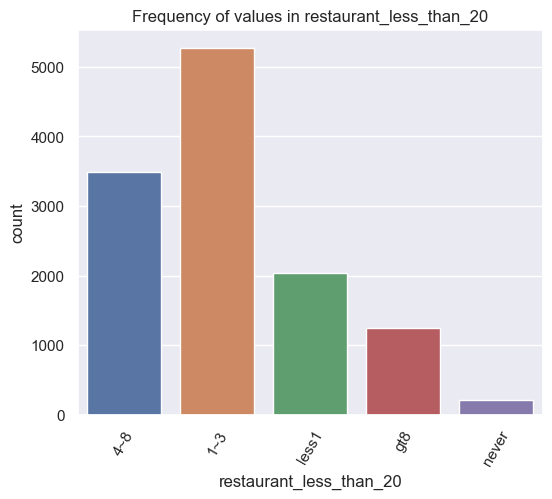

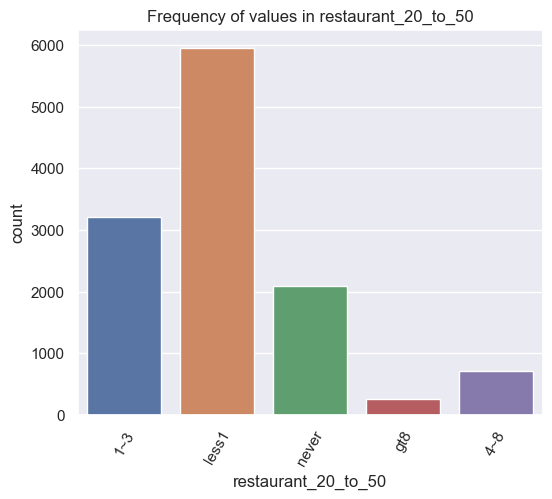

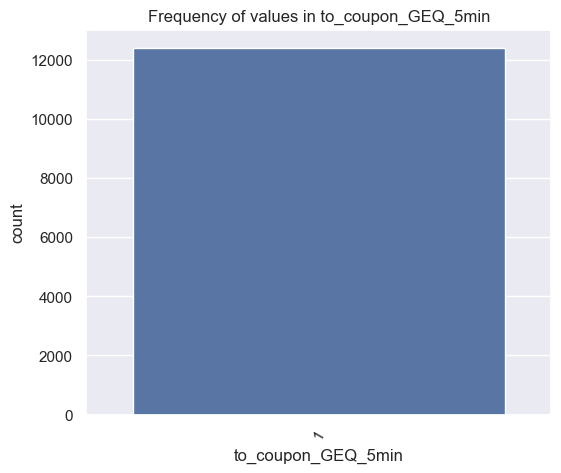

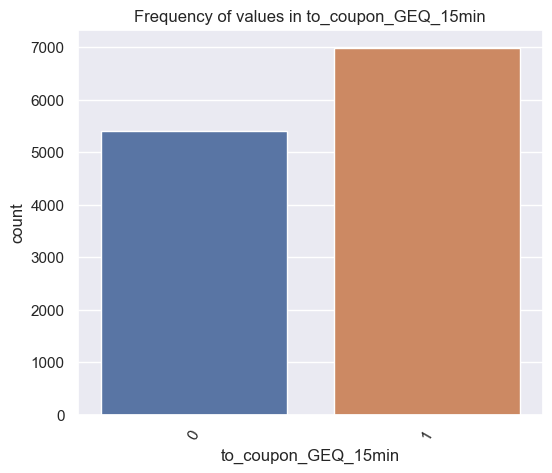

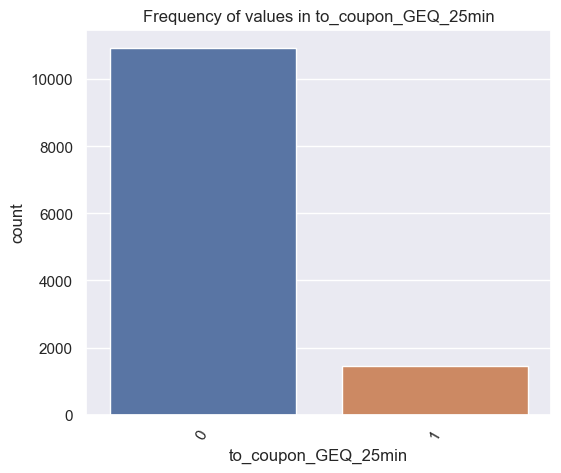

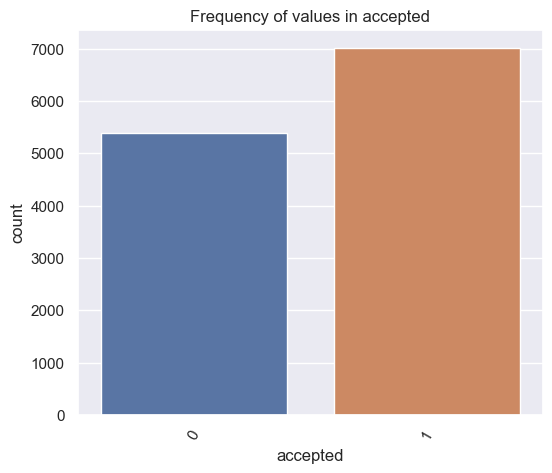

In [19]:
for feature in categorical_features:
    countplot(df, feature)

### to_coupon_GEQ_5min is has only 1 value. Dropping this feature

In [20]:
df.drop('to_coupon_GEQ_5min', inplace=True, axis=1)

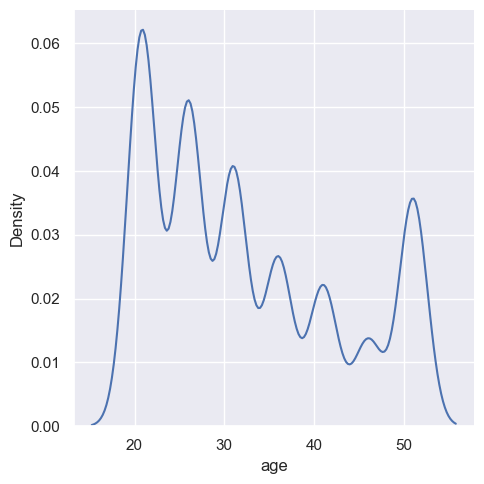

In [21]:
sns.displot(x=df['age'], kind="kde");

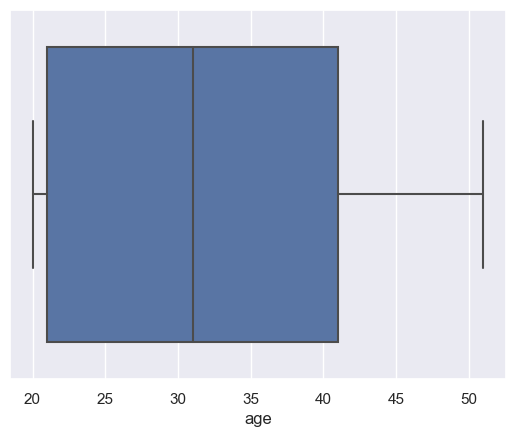

In [22]:
sns.boxplot(x=df['age']);

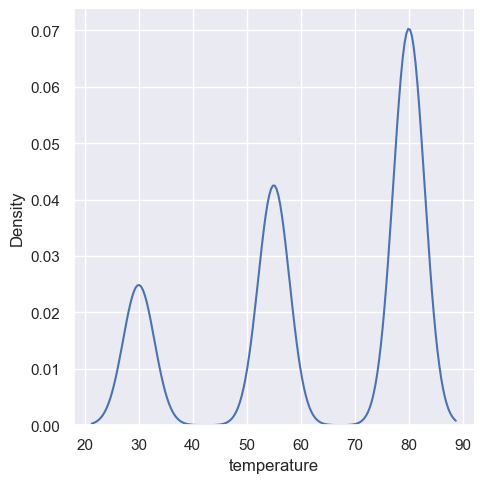

In [23]:
sns.displot(x=df['temperature'], kind="kde");

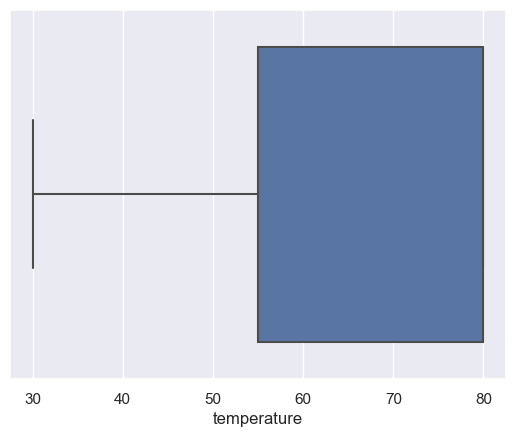

In [24]:
sns.boxplot(x=df['temperature']);

In [25]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Encoding

### Label Encoding

In [26]:
# label encoding following columns. 
label_columns = ["expiration", "gender", "education", "income", "bar", "coffee_house", 
                 "carry_away", "restaurant_less_than_20", "restaurant_20_to_50"]

# Expiration
expiration_map = {"1d":1, "2h":0}
df['expiration'] = df['expiration'].map(expiration_map)

# gender
gender_map = {"Male":1, "Female":0}
df['gender'] = df['gender'].map(gender_map)

# education
education_map = {"Some High School" :0,
                 "High School Graduate":1,
                 "Some college - no degree":2,
                 "Associates degree":3,
                 "Bachelors degree":4,
                 "Graduate degree (Masters or Doctorate)":5,}
df['education'] = df['education'].map(education_map)

# income
income_map = {"Less than $12500":0,
              "$12500 - $24999":1,
              "$25000 - $37499":2,
              "$37500 - $49999":3,
              "$50000 - $62499":4,
              "$62500 - $74999":5,
              "$75000 - $87499":6,
              "$87500 - $99999":7,
              "$100000 or More":8,}
df['income'] = df['income'].map(income_map)

#bar, coffee_house, carry_away, restaurant_less_than_20, restaurant_20_to_50 has same type of values
range_map = {"never":0,
          "less1":1,
          "1~3":2,
          "4~8":3,
          "gt8":4,}
# bar
df['bar'] = df['bar'].map(range_map)

# coffee_house
df['coffee_house'] = df['coffee_house'].map(range_map)

# carry_away
df['carry_away'] = df['carry_away'].map(range_map)

# restaurant_less_than_20
df['restaurant_less_than_20'] = df['restaurant_less_than_20'].map(range_map)

# restaurant_20_to_50
df['restaurant_20_to_50'] = df['restaurant_20_to_50'].map(range_map)

## One Hot Encoding

In [27]:
cat_columns = ["destination", "weather", "coupon", "occupation", "passenger", "marital_status"]
dummy_cols = pd.get_dummies(df[cat_columns], prefix=cat_columns, drop_first=True)
df = df.join(dummy_cols)
df.drop(cat_columns, axis=1, inplace=True)

## Spliting the data into train and test

In [28]:
X = df.drop('accepted', axis=1)
y = df['accepted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Handling Missing Values

In [29]:
# Missing values are present in following features
df.isnull().sum().sort_values(ascending=False).head(5)

coffee_house               215
restaurant_20_to_50        188
carry_away                 148
restaurant_less_than_20    128
bar                        106
dtype: int64

In [30]:
# Imputing missing values with KNN imputer. Knn imputer looks for similar examples in dataset and imputes values based on most frequent value
na_columns = ['coffee_house', 'restaurant_20_to_50', 'carry_away', 'restaurant_less_than_20', 'bar']
imputer = KNNImputer()
X_train[na_columns] = imputer.fit_transform(X_train[na_columns])
X_test[na_columns] = imputer.transform(X_test[na_columns])

## Scaling

In [31]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
std_scaler.fit(X_train)
min_max_scaler.fit(X_train);

In [32]:
X_std_scaled_train = std_scaler.transform(X_train)
X_std_scaled_test = std_scaler.transform(X_test)

## Modeling

In [33]:
def create_model(X_train, X_test, y_train, y_test, algorithm):
    """
    Creates machine learning model.

    Args:
      X_train (pandas.DataFrame): Independent Variables for training.
      X_test (pandas.DataFrame): Independent Variables for testing.
      y_train (pandas.DataFrame): Dependent or Target Variable for training.
      y_test (pandas.DataFrame): Dependent or Target Variable for testing.
      algorithm (function): Machine learning algorithm to be used.

    Returns:
      model: Machine learning model after fitting the data.
      
    """
    # Fitting the model
    model = algorithm()
    model.fit(X_train, y_train)
    
    # Predicting target variable
    y_pred = model.predict(X_test)
    
    # Evaluation of model    
    # Classification report
    print(f"Classification Report of {algorithm.__name__}: \n {classification_report(y_test, y_pred)}")
    print("-" * 100)
    print()
    
    # Accuracy Score
    print(f"Accuracy Score of {algorithm.__name__}: {accuracy_score(y_test, y_pred)}")
    print("-" * 100)
    print()
    
    # Confusion Matrix
    print(f"Confusion Matrix of {algorithm.__name__}:")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)
    plt.show()

**************************************************
****************LogisticRegression******************
Classification Report of LogisticRegression: 
               precision    recall  f1-score   support

           0       0.64      0.56      0.60      1060
           1       0.70      0.76      0.73      1419

    accuracy                           0.68      2479
   macro avg       0.67      0.66      0.66      2479
weighted avg       0.67      0.68      0.67      2479

----------------------------------------------------------------------------------------------------

Accuracy Score of LogisticRegression: 0.6768858410649455
----------------------------------------------------------------------------------------------------

Confusion Matrix of LogisticRegression:


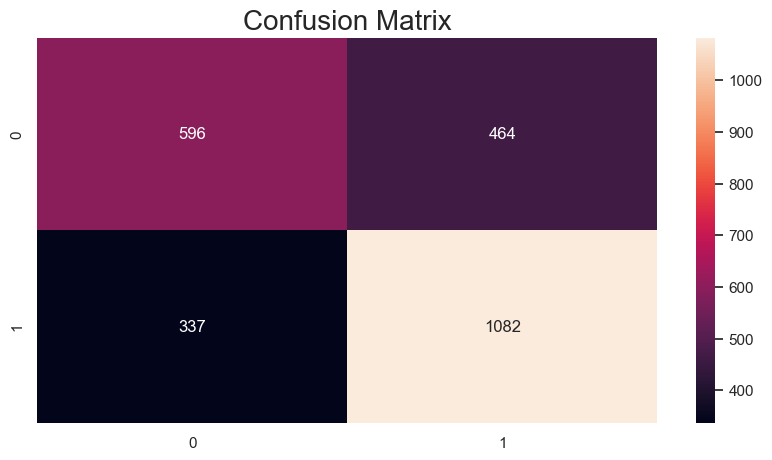

**************************************************
****************GaussianNB******************
Classification Report of GaussianNB: 
               precision    recall  f1-score   support

           0       0.56      0.59      0.58      1060
           1       0.68      0.66      0.67      1419

    accuracy                           0.63      2479
   macro avg       0.62      0.62      0.62      2479
weighted avg       0.63      0.63      0.63      2479

----------------------------------------------------------------------------------------------------

Accuracy Score of GaussianNB: 0.6296893908834207
----------------------------------------------------------------------------------------------------

Confusion Matrix of GaussianNB:


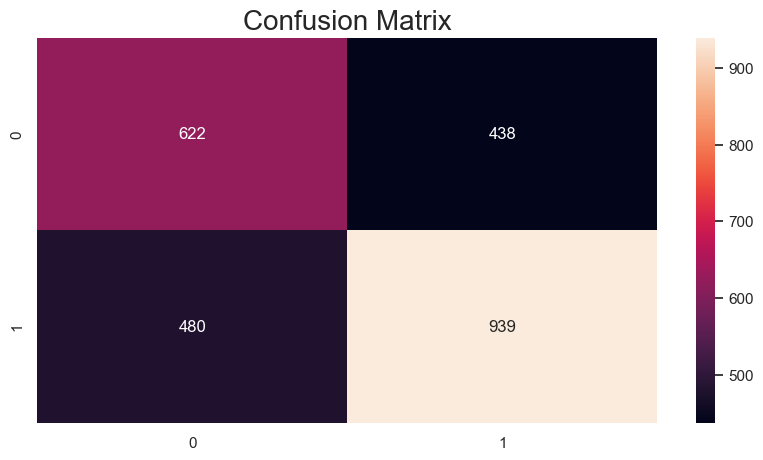

**************************************************
****************SVC******************
Classification Report of SVC: 
               precision    recall  f1-score   support

           0       1.00      0.01      0.01      1060
           1       0.57      1.00      0.73      1419

    accuracy                           0.57      2479
   macro avg       0.79      0.50      0.37      2479
weighted avg       0.76      0.57      0.42      2479

----------------------------------------------------------------------------------------------------

Accuracy Score of SVC: 0.5748285599031868
----------------------------------------------------------------------------------------------------

Confusion Matrix of SVC:


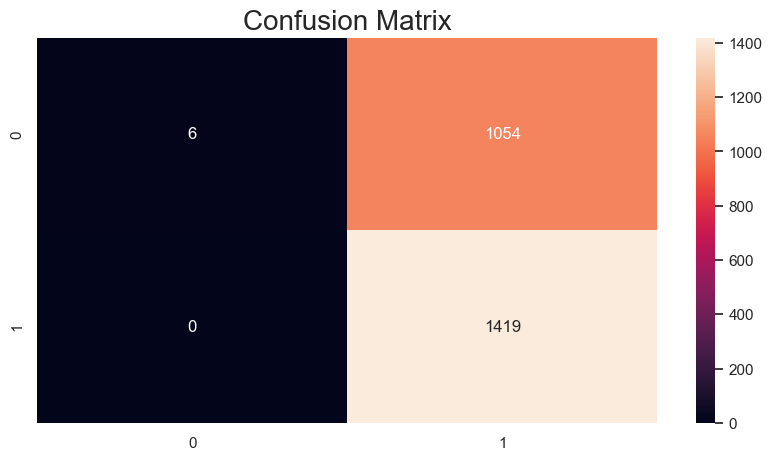

**************************************************
****************DecisionTreeClassifier******************
Classification Report of DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      1060
           1       0.74      0.71      0.73      1419

    accuracy                           0.69      2479
   macro avg       0.69      0.69      0.69      2479
weighted avg       0.70      0.69      0.69      2479

----------------------------------------------------------------------------------------------------

Accuracy Score of DecisionTreeClassifier: 0.6938281565147236
----------------------------------------------------------------------------------------------------

Confusion Matrix of DecisionTreeClassifier:


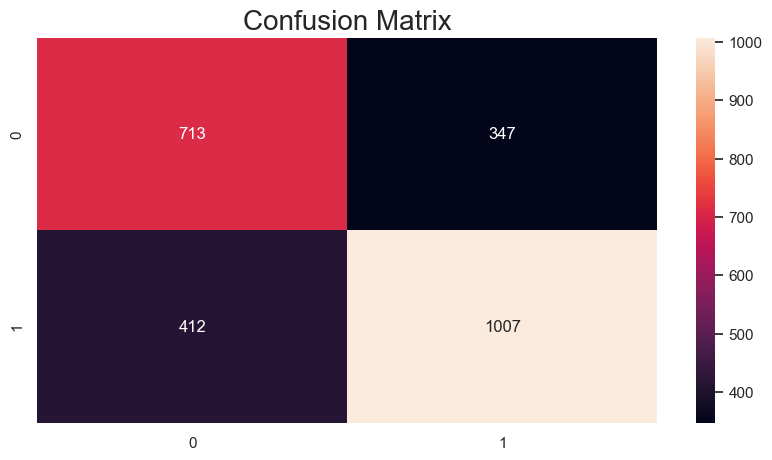

**************************************************
****************RandomForestClassifier******************
Classification Report of RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.73      0.66      0.69      1060
           1       0.76      0.82      0.79      1419

    accuracy                           0.75      2479
   macro avg       0.75      0.74      0.74      2479
weighted avg       0.75      0.75      0.75      2479

----------------------------------------------------------------------------------------------------

Accuracy Score of RandomForestClassifier: 0.7511093182734974
----------------------------------------------------------------------------------------------------

Confusion Matrix of RandomForestClassifier:


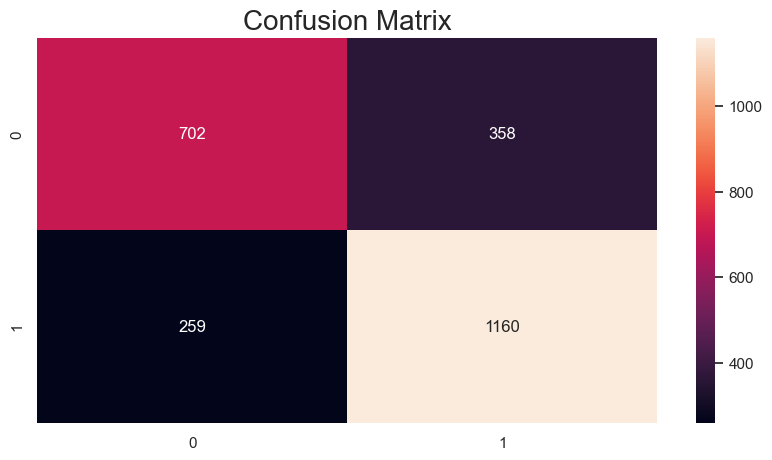

In [34]:
algorithms = [LogisticRegression, GaussianNB, SVC, DecisionTreeClassifier, RandomForestClassifier]
for algo in algorithms:
    print("**************************************************")
    print(f"****************{algo.__name__}******************")
    create_model(X_train, X_test, y_train, y_test, algo)